In [37]:
from infrastructure.classes import Experiment
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float32, device=torch.device("cpu")),
    dataset_name="fnlvqr_banana",
    dataset_number_of_points=10**6,
    dataloader_parameters=dict(batch_size=256, shuffle=True),
    pushforward_operator_name="mean_quantile_regression",
    pushforward_operator_parameters=dict(
        response_dimension=2,
    )
)

model = train(experiment)
_ = model.load("model.pth")

In [31]:
from datasets import PICNN_FNLVQR_Banana

dataset = PICNN_FNLVQR_Banana(tensor_parameters=experiment.tensor_parameters)
X, Y, U = dataset.sample_x_y_u(n_points=1000)
U_approximate = model.push_y_given_x(Y, X)
Y_approximate = model.push_u_given_x(U, X)

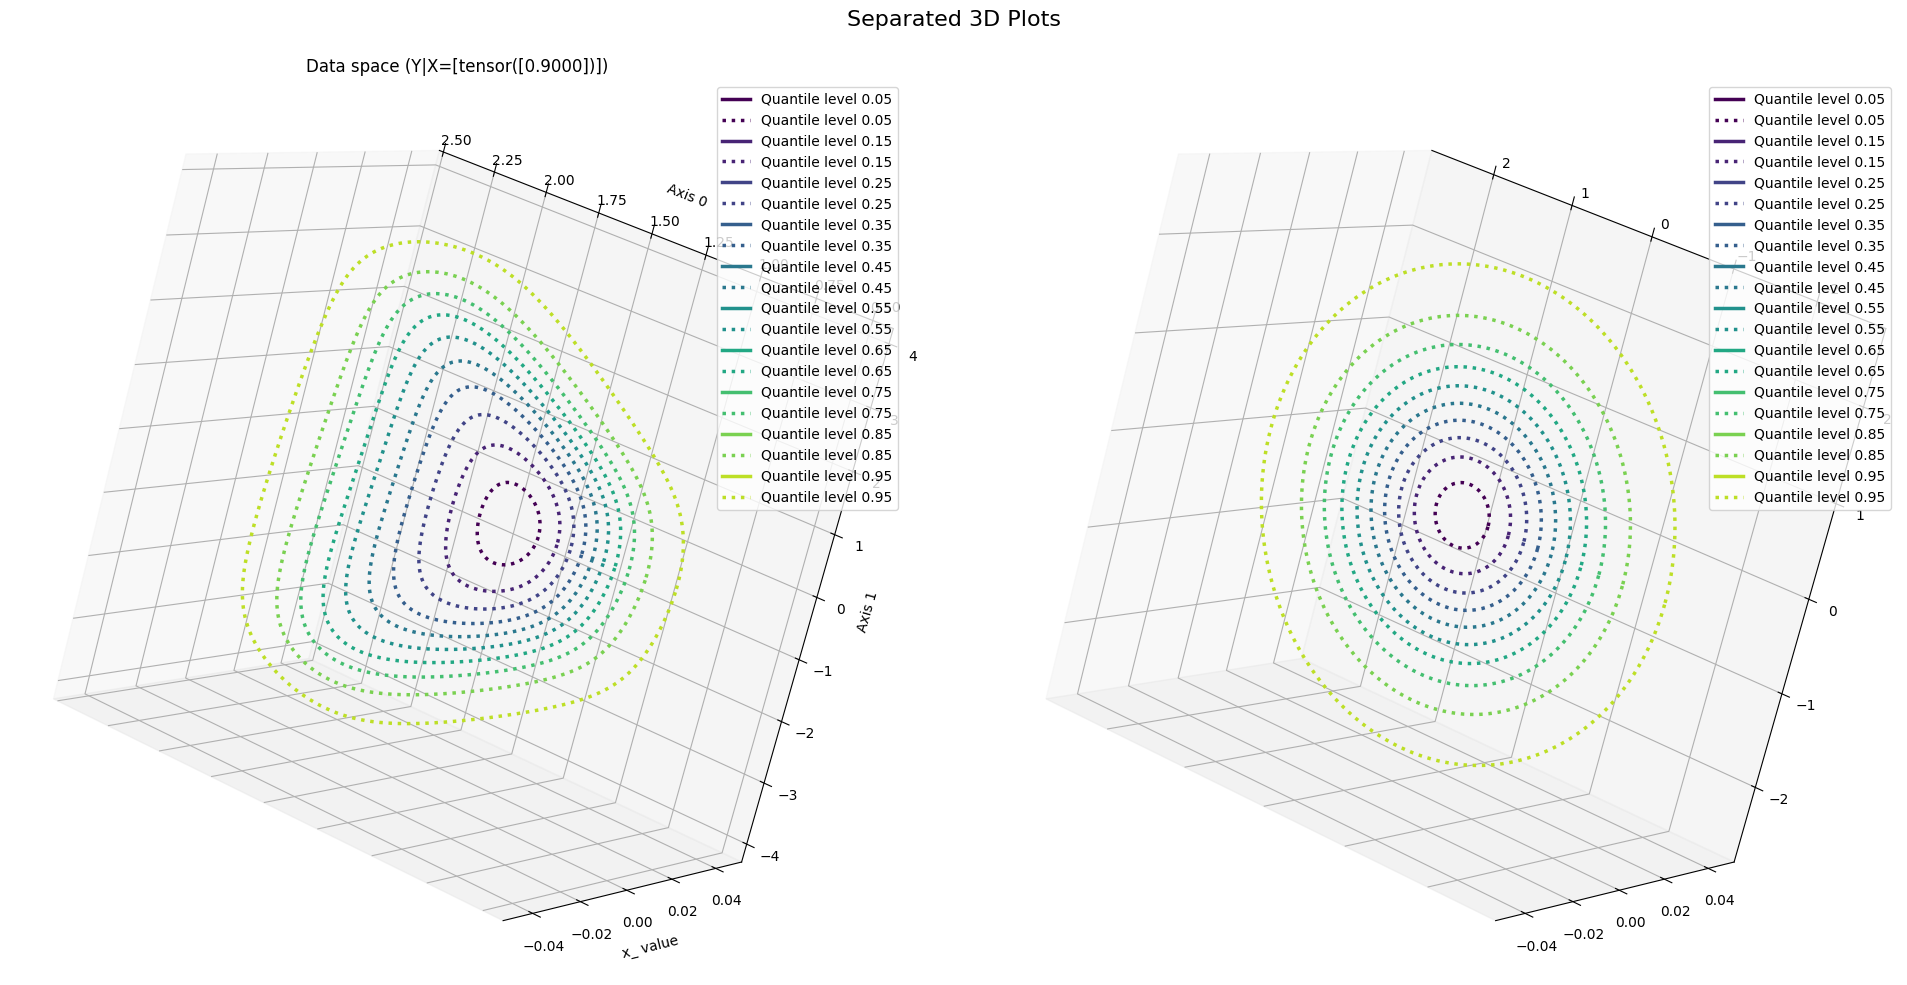

In [2]:
%matplotlib inline
from utils.plot import plot_quantile_levels_from_dataset
from datasets import PICNN_FNLVQR_Banana
dataset = PICNN_FNLVQR_Banana(tensor_parameters=experiment.tensor_parameters)

plot_quantile_levels_from_dataset(
    model=model,
    dataset=dataset,
    conditional_value=torch.Tensor([[.9]]),
    number_of_quantile_levels=10,
    tensor_parameters=experiment.tensor_parameters
)